# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [32]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 592


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    
    units = "metric"
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aasiaat
Processing Record 2 of Set 1 | bryanka
Processing Record 3 of Set 1 | itaocara
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | adamstown
Processing Record 6 of Set 1 | la'ie
Processing Record 7 of Set 1 | waitangi
Processing Record 8 of Set 1 | la passe
Processing Record 9 of Set 1 | merizo village
Processing Record 10 of Set 1 | bredasdorp
Processing Record 11 of Set 1 | port lincoln
Processing Record 12 of Set 1 | i-n-salah
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | ilebo
Processing Record 15 of Set 1 | tomar
Processing Record 16 of Set 1 | taltal
Processing Record 17 of Set 1 | utrik
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | praia da vitoria
Processing Record 20 of Set 1 | papatowai
Processing Record 21 of Set 1 | afaahiti
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 of Se

In [14]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [15]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,aasiaat,68.7098,-52.8699,-22.28,96,100,1.91,GL,1738716350
1,bryanka,48.5110,38.6722,-3.70,87,83,4.86,UA,1738716351
2,itaocara,-21.6692,-42.0761,23.71,91,100,1.78,BR,1738716353
3,grytviken,-54.2811,-36.5092,3.31,86,53,9.59,GS,1738716354
4,adamstown,-25.0660,-130.1015,25.20,77,5,5.50,PN,1738716355


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-22.28,96,100,1.91,GL,1738716350
1,bryanka,48.5110,38.6722,-3.70,87,83,4.86,UA,1738716351
2,itaocara,-21.6692,-42.0761,23.71,91,100,1.78,BR,1738716353
3,grytviken,-54.2811,-36.5092,3.31,86,53,9.59,GS,1738716354
4,adamstown,-25.0660,-130.1015,25.20,77,5,5.50,PN,1738716355


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

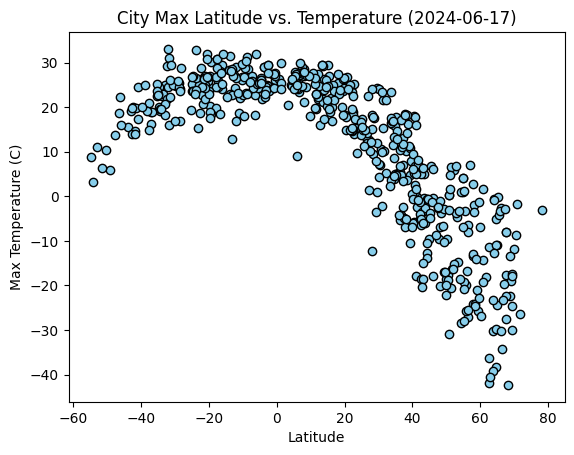

In [18]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", color="skyblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

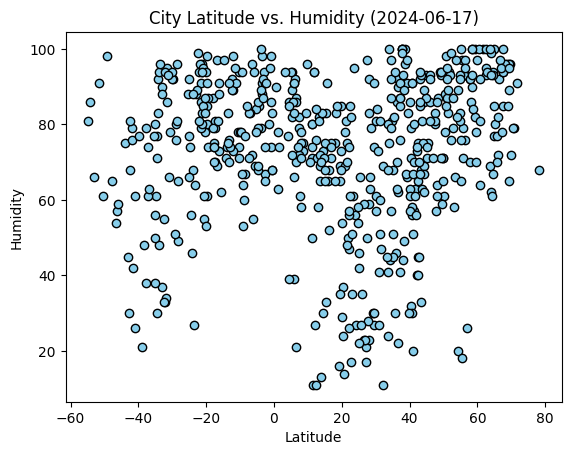

In [19]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", color="skyblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Latitude vs. Humidity (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

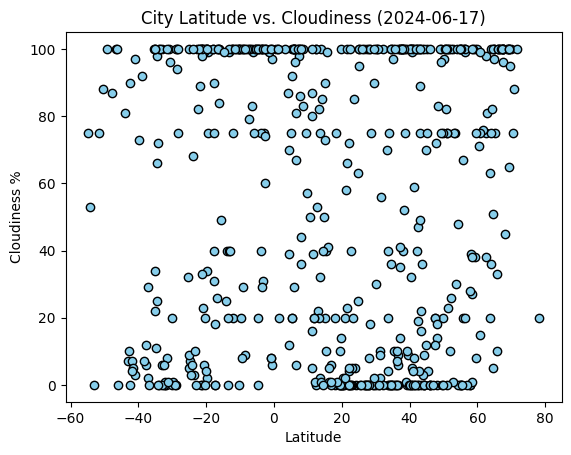

In [21]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", color="skyblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.title("City Latitude vs. Cloudiness (2024-06-17)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

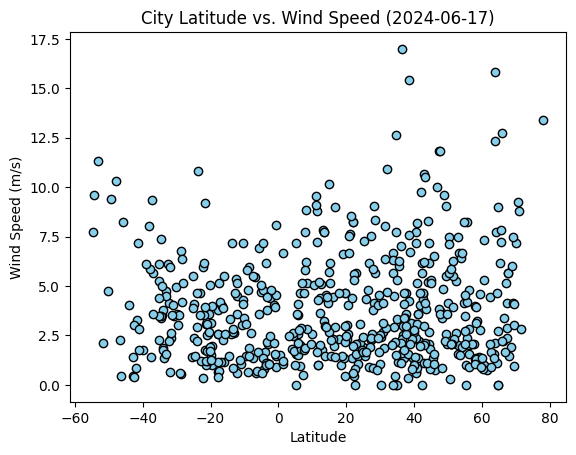

In [23]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", color="skyblue", edgecolor="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2024-06-17)")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots

def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coord):
        slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
        plt.scatter(x_values, y_values, color="skyblue", edgecolor="black")
        plt.plot(x_values, regress_values, color="red")
        plt.title(title)
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        plt.annotate(line_eq, coord, fontsize=15, color="red")
        plt.show()

In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)

northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,aasiaat,68.7098,-52.8699,-22.28,96,100,1.91,GL,1738716350
1,bryanka,48.5110,38.6722,-3.70,87,83,4.86,UA,1738716351
5,la'ie,21.6477,-157.9253,24.47,75,66,1.34,US,1738716356
7,la passe,45.5549,-0.8967,6.87,75,4,1.36,FR,1738716359
8,merizo village,13.2658,144.6691,29.43,82,82,7.81,GU,1738716360


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)

southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,itaocara,-21.6692,-42.0761,23.71,91,100,1.78,BR,1738716353
3,grytviken,-54.2811,-36.5092,3.31,86,53,9.59,GS,1738716354
4,adamstown,-25.0660,-130.1015,25.20,77,5,5.50,PN,1738716355
6,waitangi,-43.9535,-176.5597,15.46,75,81,4.02,NZ,1738716357
9,bredasdorp,-34.5322,20.0403,19.14,71,25,3.37,ZA,1738716361


###  Temperature vs. Latitude Linear Regression Plot

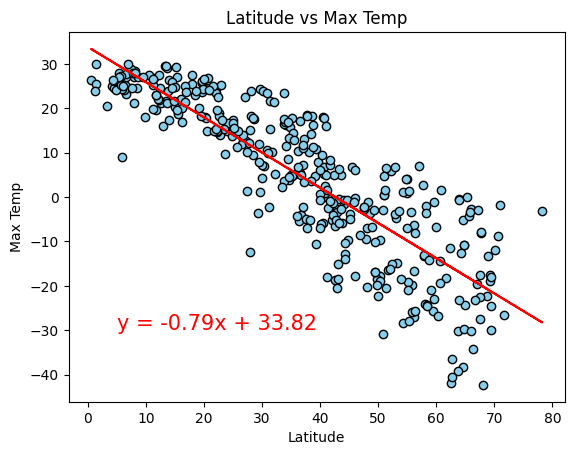

In [174]:
# Linear regression on Northern Hemisphere

plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    "Latitude vs Max Temp",
    "Latitude", 
    "Max Temp", 
    (5, -30)
)

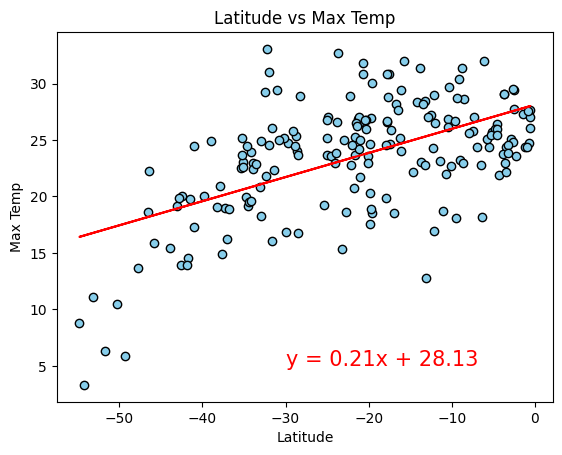

In [91]:
# Linear regression on Southern Hemisphere

plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    "Latitude vs Max Temp",
    "Latitude", 
    "Max Temp", 
    (-30, 5)
)

**Discussion about the linear relationship: 

• The latitude and max temperature for the Northern Hemisphere are negatively correlated.

• The latitude and max temperature for the Southern Hemisphere are positively correlated.


### Humidity vs. Latitude Linear Regression Plot

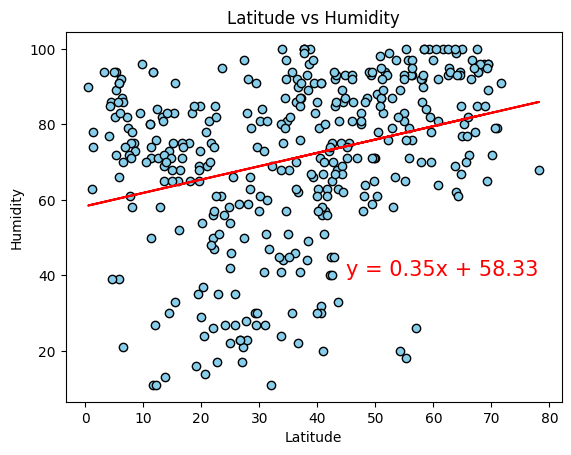

In [92]:
# Northern Hemisphere

plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    "Latitude vs Humidity",
    "Latitude", 
    "Humidity", 
    (45, 40)
)

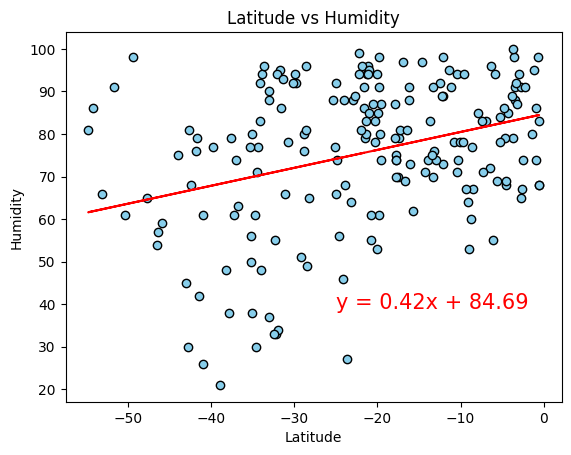

In [175]:
# Southern Hemisphere

plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    "Latitude vs Humidity",
    "Latitude", 
    "Humidity", 
    (-25, 39)
)

**Discussion about the linear relationship: 

• The latitude and humidity for the Northern Hemisphere are positively correlated.

• The latitude and humidity for the Southern Hemisphere are positively correlated.

### Cloudiness vs. Latitude Linear Regression Plot

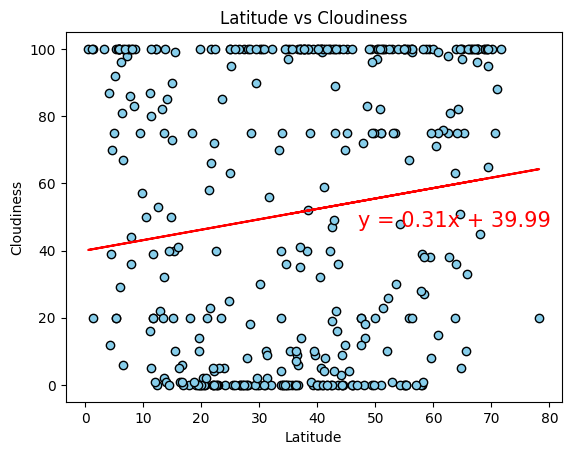

In [134]:
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    "Latitude vs Cloudiness",
    "Latitude", 
    "Cloudiness", 
    (47, 47)
)

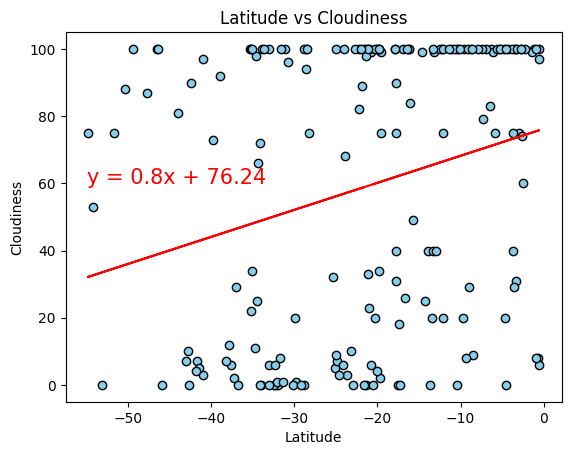

In [146]:
# Southern Hemisphere

plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    "Latitude vs Cloudiness",
    "Latitude", 
    "Cloudiness", 
    (-55, 60)
)

**Discussion about the linear relationship: 

• The latitude and cloudiness for the Northern Hemisphere are not correlated.

• The latitude and cloudiness for the Southern Hemisphere are not correlated.

### Wind Speed vs. Latitude Linear Regression Plot

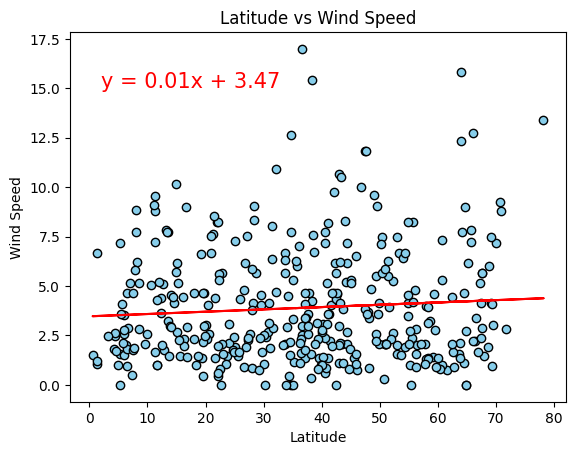

In [162]:
# Northern Hemisphere

plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    "Latitude vs Wind Speed",
    "Latitude", 
    "Wind Speed", 
    (2,15)
)

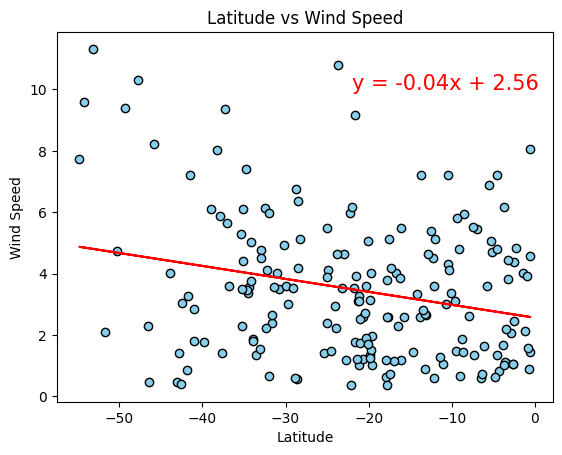

In [173]:
# Southern Hemisphere

plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    "Latitude vs Wind Speed",
    "Latitude", 
    "Wind Speed", 
    (-22, 10)
)

**Discussion about the linear relationship: 

• The latitude and wind speed for the Northern Hemisphere are positively correlated.

• The latitude and wind speed for the Southern Hemisphere are negatively correlated.